In [779]:
import numpy as np
# import SoccerNet as sn
import torch
import matplotlib.pyplot as plt
# from SoccerNet.Downloader import SoccerNetDownloader
# mySoccerNetDownloader=SoccerNetDownloader(LocalDirectory="./Data")
import cv2

In [780]:
arr = [[     432.22,      423.56,      458.49,      498.79],
       [     514.62,      485.65,      541.39,      560.73],
       [     450.68,      405.63,      478.15,      475.73],
       [     461.13,      272.91,      492.62,      329.59],
       [     376.87,      405.79,      400.15,      477.38],
       [     490.25,      300.99,      517.73,      363.05],
       [     318.47,      269.04,      338.86,      329.96],
       [     164.51,      369.99,      192.06,      442.03],
       [     838.78,      257.84,      861.77,      354.99],
       [     762.38,      220.32,      787.03,      290.24],
       [     1024.9,      582.93,      1051.2,      602.01],
       [     280.13,       478.8,      308.02,      551.82],
       [     165.68,      449.35,      196.14,       527.1]]

data= ['player', 'player', 'player', 'player', 'player', 'player', 'player', 'player', 'player', 'player', 'player', 'player', 'player']


In [781]:
lines_coords = [[[0., 54.16, 0.], [16.5, 54.16, 0.]],
                [[16.5, 13.84, 0.], [16.5, 54.16, 0.]],
                [[16.5, 13.84, 0.], [0., 13.84, 0.]],
                [[88.5, 54.16, 0.], [105., 54.16, 0.]],
                [[88.5, 13.84, 0.], [88.5, 54.16, 0.]],
                [[88.5, 13.84, 0.], [105., 13.84, 0.]],
                [[0., 37.66, -2.44], [0., 30.34, -2.44]],
                [[0., 37.66, 0.], [0., 37.66, -2.44]],
                [[0., 30.34, 0.], [0., 30.34, -2.44]],
                [[105., 37.66, -2.44], [105., 30.34, -2.44]],
                [[105., 30.34, 0.], [105., 30.34, -2.44]],
                [[105., 37.66, 0.], [105., 37.66, -2.44]],
                [[52.5, 0., 0.], [52.5, 68, 0.]],
                [[0., 68., 0.], [105., 68., 0.]],
                [[0., 0., 0.], [0., 68., 0.]],
                [[105., 0., 0.], [105., 68., 0.]],
                [[0., 0., 0.], [105., 0., 0.]],
                [[0., 43.16, 0.], [5.5, 43.16, 0.]],
                [[5.5, 43.16, 0.], [5.5, 24.84, 0.]],
                [[5.5, 24.84, 0.], [0., 24.84, 0.]],
                [[99.5, 43.16, 0.], [105., 43.16, 0.]],
                [[99.5, 43.16, 0.], [99.5, 24.84, 0.]],
                [[99.5, 24.84, 0.], [105., 24.84, 0.]]]

In [782]:
nl = []
for l in lines_coords:
    t = []
    for p in l:
        t.append([p[0]-52.5, p[1]-34, p[2]])
    nl.append(t)

In [783]:
# circle_coords = [[52.5, 34],[11,34],[94, 34]]
circle_coords = []
circle_coords = np.array(circle_coords)

In [784]:
lines_coords = np.array(lines_coords)

In [785]:
def project(frame, P):
    new_lines = []
    for line in lines_coords:
        w1 = line[0]
        w2 = line[1]
        i1 = P @ np.array([w1[0]-105/2, w1[1]-68/2, w1[2], 1])
        i2 = P @ np.array([w2[0]-105/2, w2[1]-68/2, w2[2], 1])
        i1 /= i1[-1]
        i2 /= i2[-1]
        new_line = [i1,i2]
        new_lines += [new_line]
        print(i1, i2)
        frame = cv2.line(frame, (int(i1[0]), int(i1[1])), (int(i2[0]), int(i2[1])), (255, 0, 0), 3)

    r = 9.15
    pts1, pts2, pts3 = [], [], []
    base_pos = np.array([11-105/2, 68/2-68/2, 0., 0.])
    for ang in np.linspace(37, 143, 50):
        ang = np.deg2rad(ang)
        pos = base_pos + np.array([r*np.sin(ang), r*np.cos(ang), 0., 1.])
        ipos = P @ pos
        ipos /= ipos[-1]
        pts1.append([ipos[0], ipos[1]])

    base_pos = np.array([94-105/2, 68/2-68/2, 0., 0.])
    for ang in np.linspace(217, 323, 200):
        ang = np.deg2rad(ang)
        pos = base_pos + np.array([r*np.sin(ang), r*np.cos(ang), 0., 1.])
        ipos = P @ pos
        ipos /= ipos[-1]
        pts2.append([ipos[0], ipos[1]])

    base_pos = np.array([0, 0, 0., 0.])
    for ang in np.linspace(0, 360, 500):
        ang = np.deg2rad(ang)
        pos = base_pos + np.array([r*np.sin(ang), r*np.cos(ang), 0., 1.])
        ipos = P @ pos
        ipos /= ipos[-1]
        pts3.append([ipos[0], ipos[1]])

    XEllipse1 = np.array(pts1, np.int32)
    XEllipse2 = np.array(pts2, np.int32)
    XEllipse3 = np.array(pts3, np.int32)
    frame = cv2.polylines(frame, [XEllipse1], False, (255, 0, 0), 3)
    frame = cv2.polylines(frame, [XEllipse2], False, (255, 0, 0), 3)
    frame = cv2.polylines(frame, [XEllipse3], False, (255, 0, 0), 3)

    for ar_pt in arr:
        x1, y1, x2, y2 = ar_pt
        frame = cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 3)
        

    return frame, new_lines

In [786]:
P = [[ 3.63012504e+03,  9.79367218e+02,  6.91838515e+01, -1.05309533e+05],
 [-1.16540985e+02,  3.34528792e+02,  3.71743635e+03,  4.87286272e+04],
 [ 3.88544208e-01, -9.04717296e-01,  1.74699779e-01,  9.90950047e+01]]

In [787]:
P_smol = [[P[0][0], P[0][1], P[0][3]],
          [P[1][0], P[1][1], P[1][3]],
          [P[2][0], P[2][1], P[2][3]]]

In [788]:
def get_new_lines(lines_coords):
    new_lines = []
    unscaled_new_lines = []
    for line in lines_coords:
        w1 = line[0]
        w2 = line[1]
        i1 = P @ np.array([w1[0]-105/2, w1[1]-68/2, w1[2], 1])
        i2 = P @ np.array([w2[0]-105/2, w2[1]-68/2, w2[2], 1])
        #print(f'w1: {w1}')
        #print(f'i1: {i1}')
        unscaled_line = [i1,i2]
        
        unscaled_new_lines += [unscaled_line]

        scaled_i1 = i1/i1[-1]
        scaled_i2 = i2/i2[-1]
        #print(f'i1 after scaling: {scaled_i1}')
        new_line = [scaled_i1, scaled_i2]
        new_lines += [new_line]
    #print(unscaled_new_lines)
    return new_lines, unscaled_new_lines

In [789]:
def get_original_lines(new_lines, unscaled_lines):
    original_lines = []
    
    for it,new_line in enumerate(new_lines):
        scale1 = unscaled_lines[it][0][2]
        scale2 = unscaled_lines[it][1][2]
        
        i1 = new_line[0]
        i2 = new_line[1]
        
        print(f'i1 before scaling: {i1}')
        i1 *= scale1
        i2 *= scale2
        P_inv = np.linalg.inv(np.array(P_smol))
        
        w1 = P_inv @ np.array(i1)
        w2 = P_inv @ np.array(i2)
        
        w1[0] += 105/2
        w2[0] += 105/2
        w1[1] += 68/2
        w2[1] += 68/2
        
        print(f'i1: {i1}')
        print(f'w1: {w1}')
        og_line = [w1, w2]
        original_lines += [og_line]

    return original_lines

In [790]:
# from minimap to camera pov
def transform_point(point):
    unscaled_point = P @ np.array([point[0] - 105/2, point[1] - 68/2, 0, 1])
    return unscaled_point


# from camera pov to minimap
def get_map_point(point):
    point = np.linalg.inv(np.array(P_smol)) @ np.array(point)
    point = point/point[2]
    point[0] += 105/2
    point[1] += 68/2
    return (point[0], point[1])


In [791]:
pt = [52.5, 34]
t_pt = transform_point(pt)
scalar = np.random.uniform(1, 10)
t_pt = t_pt * scalar
print(t_pt)
m_pt = get_map_point(t_pt)
print(m_pt)

[-6.84498528e+05  3.16729860e+05  6.44104887e+02]
(52.5, 33.999999999999986)


In [792]:
img = 'examples/messi_sample.png'

In [793]:
messi = cv2.imread(img)

In [794]:
output,new_lines = project(messi,P)

[-4.56763539e+03  1.01875366e+03  1.00000000e+00] [-3.23396813e+03  8.92324045e+02  1.00000000e+00]
[-2.47456898e+03  4.46846250e+02  1.00000000e+00] [-3.23396813e+03  8.92324045e+02  1.00000000e+00]
[-2.47456898e+03  4.46846250e+02  1.00000000e+00] [-3.25613453e+03  4.96236274e+02  1.00000000e+00]
[475.72067348 540.6512267    1.        ] [1.03714996e+03 4.87428590e+02 1.00000000e+00]
[ 42.8788651  287.75938929   1.        ] [475.72067348 540.6512267    1.        ]
[ 42.8788651  287.75938929   1.        ] [475.76210847 260.40389254   1.        ]
[-3.90181043e+03  6.27021727e+02  1.00000000e+00] [-3.67294842e+03  5.46105994e+02  1.00000000e+00]
[-3.87750826e+03  7.43798885e+02  1.00000000e+00] [-3.90181043e+03  6.27021727e+02  1.00000000e+00]
[-3.65179837e+03  6.53873406e+02  1.00000000e+00] [-3.67294842e+03  5.46105994e+02  1.00000000e+00]
[766.16049437 300.32173971   1.        ] [666.11937595 264.06015776   1.        ]
[665.18181993 337.00503822   1.        ] [666.11937595 264.0601577

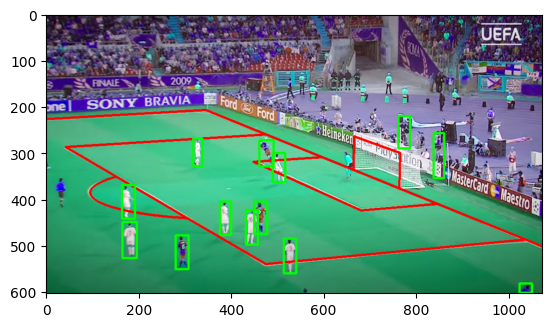

In [795]:
plt.imshow(messi)

In [796]:
messi.shape

(603, 1073, 3)

In [797]:
len(new_lines)

23

In [798]:
def new_plot(lines_coords):
    for line in lines_coords:
        w1 = line[0]
        w2 = line[1]
        i1 = P @ np.array([w1[0]-105/2, w1[1]-68/2, w1[2], 1])  
        i2 = P @ np.array([w2[0]-105/2, w2[1]-68/2, w2[2], 1])
        i1 /= i1[-1]
        i2 /= i2[-1]
        plt.plot([i1[0], i2[0]], [-i1[1], -i2[1]], 'r')
    
    for ar_pt in arr:
        x1, y1, x2, y2 = ar_pt
        # Plot the rectangle
        plt.plot([x1, x2], [-y1, -y1], 'g')
        plt.plot([x2, x2], [-y1, -y2], 'g')
        plt.plot([x2, x1], [-y2, -y2], 'g')
        plt.plot([x1, x1], [-y2, -y1], 'g')
    plt.ylim((-603,0))
    plt.xlim((0,1073))
    plt.show()

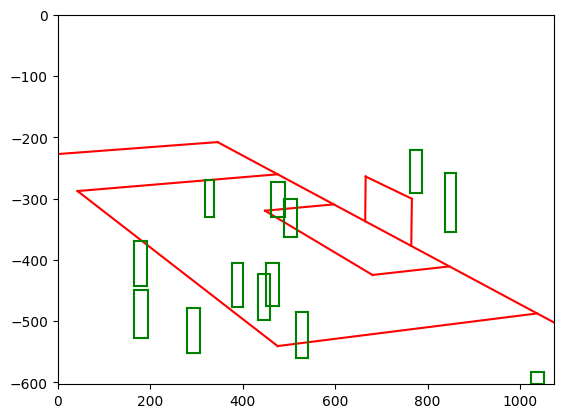

In [799]:
new_plot(lines_coords)

In [800]:
things = [get_map_point([(x1+x2)/2, y2,1]) for x1,y1,x2,y2 in arr]
things

[(89.52525489003777, 49.51235655752478),
 (88.91529449013734, 56.58711376583267),
 (91.04764072754173, 47.114204303641706),
 (99.71346239294739, 26.857076539705528),
 (89.03673091349032, 46.5418040556292),
 (98.30670463861642, 32.563637426602945),
 (95.09487854291305, 25.143889669698623),
 (85.08665268682495, 40.08451500178656),
 (109.23294136000663, 35.35117330886779),
 (112.45031615836714, 23.583289942885163),
 (98.68010594953788, 64.83711766619703),
 (83.80942269453556, 53.568650872484845),
 (81.9828069524505, 49.99500650422851)]

In [801]:
def plot_things(things):
    for line in lines_coords:
        x1, y1, _ = line[0]
        x2, y2, _ = line[1]
        plt.plot([x1, x2], [y1, y2], 'r')
    
    for thing in things:
        x, y = thing
        plt.scatter(x, y, c='g', marker='x')
    # mirror the plot
    plt.ylim((0,68))
    plt.xlim((0,105))
    plt.gca().invert_yaxis()
    plt.show()

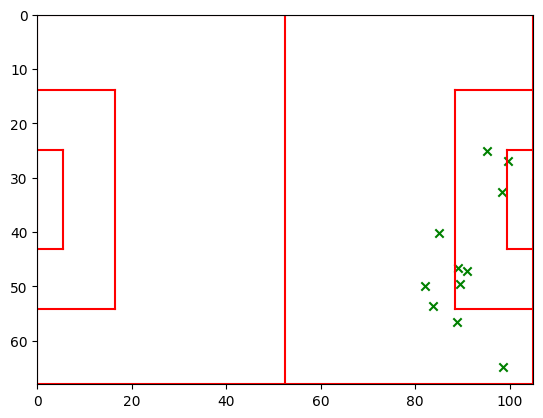

In [802]:
plot_things(things) 

In [803]:
def plot_map(lines, points, P = None):
    if P is not None:
        lines, unscaled_lines = get_new_lines(lines)
        unscaled_points = [transform_point(point) for point in points]
        scaled_points = [upoint / upoint[-1] for upoint in unscaled_points]
        scaled_points = np.array(scaled_points)
        for i, line in enumerate(lines):
            x1,y1,_ = line[0]
            x2,y2,_ = line[1]
            plt.plot((x1,x2),(-y1,-y2))
            plt.ylim((-603,0))
            plt.xlim((0,1073))
        # plt.scatter(scaled_points[:,0], -scaled_points[:,1])
        for i, point in enumerate(scaled_points):
            plt.scatter(point[0], -point[1])
    else:
        points = [get_map_point(point) for point in points]
        for i,line in enumerate(lines):
            x1,y1,_ = line[0]
            x2,y2,_ = line[1]
            plt.plot((x1,x2),(y1,y2))
        points = np.array(points)
        # plt.scatter(points[:,0], points[:,1])
        for i, point in enumerate(points):
            plt.scatter(point[0], point[1])


In [804]:
list(P_smol @ np.array([0,0,1]))

[-105309.533, 48728.6272, 99.0950047]

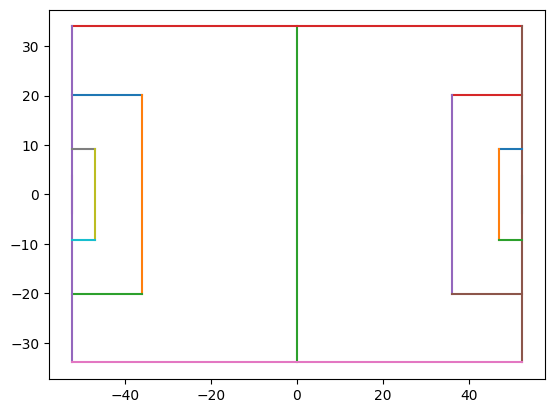

In [805]:
plot_map(nl, circle_coords)

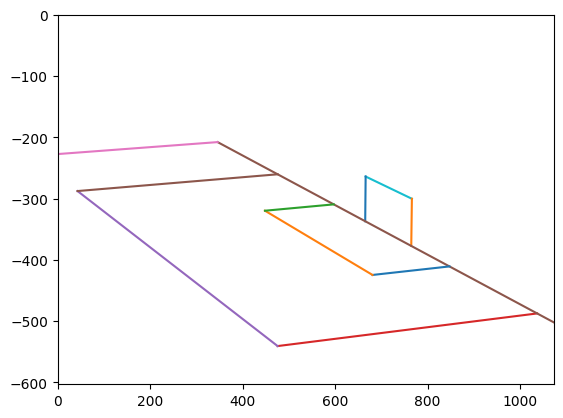

In [806]:
plot_map(lines_coords, circle_coords, P)

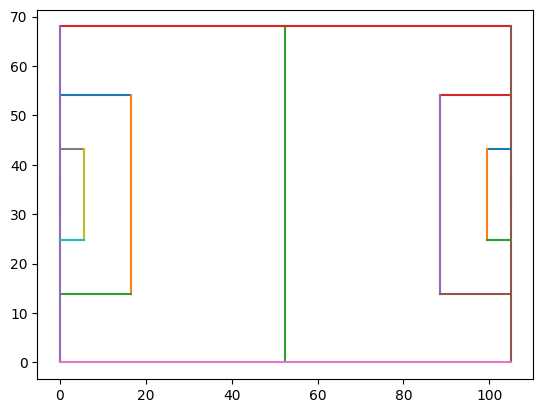

In [807]:
for i,line in enumerate(lines_coords):
    x1,y1,_ = line[0]
    x2,y2,_ = line[1]
    plt.plot((x1,x2),(y1,y2))

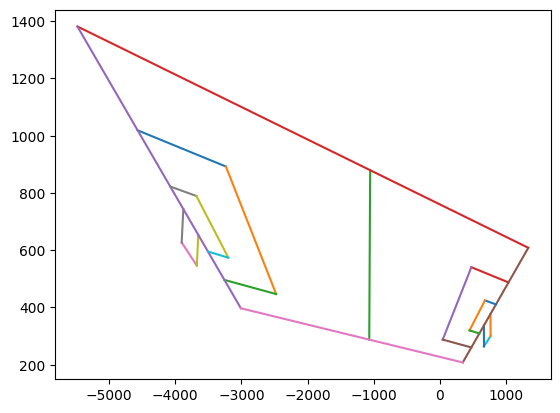

In [808]:
for i,line in enumerate(new_lines):
    x1,y1,_ = line[0]
    x2,y2,_ = line[1]
    plt.plot((x1,x2),(y1,y2))

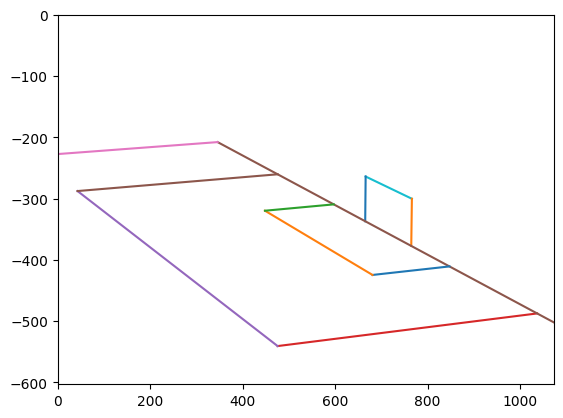

In [809]:
for i,line in enumerate(new_lines):
    x1,y1,_ = line[0]
    x2,y2,_ = line[1]
    plt.plot((x1,x2),(-y1,-y2))
    plt.ylim((-603,0))
    plt.xlim((0,1073))
for data in arr:
    # Plot a rectangle
    x1,y1,x2,y2 = data
    plt.plot((x1,x2),(y1,y1))
    plt.plot((x1,x2),(y2,y2))
    plt.plot((x1,x1),(y1,y2))
    plt.plot((x2,x2),(y1,y2))
plt.show()


In [810]:
new_lines,unscaled_new_lines = get_new_lines(lines_coords)

In [811]:
og_lines = get_original_lines(new_lines, unscaled_new_lines)

i1 before scaling: [-4.56763539e+03  1.01875366e+03  1.00000000e+00]
i1: [-2.76147054e+05  6.15911294e+04  6.04573331e+01]
w1: [-7.10542736e-15  5.41600000e+01  1.00000000e+00]
i1 before scaling: [-2.47456898e+03  4.46846250e+02  1.00000000e+00]
i1: [-2.55738078e+05  4.61800022e+04  1.03346514e+02]
w1: [16.5  13.84  1.  ]
i1 before scaling: [-2.47456898e+03  4.46846250e+02  1.00000000e+00]
i1: [-2.55738078e+05  4.61800022e+04  1.03346514e+02]
w1: [16.5  13.84  1.  ]
i1 before scaling: [475.72067348 540.6512267    1.        ]
i1: [45119.01155488 51277.25218672    94.8434955 ]
w1: [88.5  54.16  1.  ]
i1 before scaling: [ 42.8788651  287.75938929   1.        ]
i1: [ 5630.92532512 37789.05129328   131.32169688]
w1: [88.5  13.84  1.  ]
i1 before scaling: [ 42.8788651  287.75938929   1.        ]
i1: [ 5630.92532512 37789.05129328   131.32169688]
w1: [88.5  13.84  1.  ]
i1 before scaling: [-3.90181043e+03  6.27021727e+02  1.00000000e+00]
i1: [-2.92475422e+05  4.70008596e+04  7.49589010e+01]
w

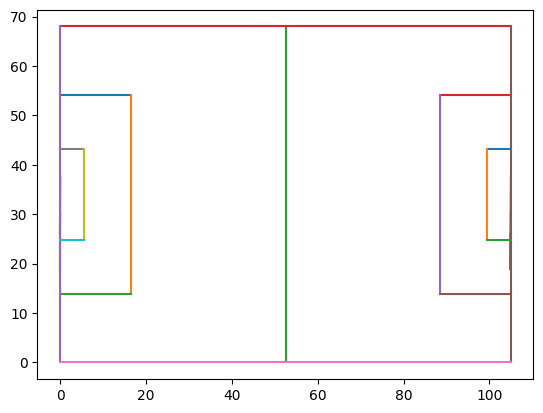

In [812]:
for i,line in enumerate(og_lines):
    x1,y1,_ = line[0]
    x2,y2,_ = line[1]
    plt.plot((x1,x2),(y1,y2))
